In [570]:
from bs4 import BeautifulSoup

In [571]:
html_doc = open('List_of_postal_codes_of_Canada__M.html',encoding='utf-8',errors='ignore')

In [572]:
soup=BeautifulSoup(html_doc,'html.parser')

In [573]:
soup.title

<title>List of postal codes of Canada: M - Wikipedia</title>

In [574]:
import pandas as pd

In [575]:
dfs = pd.read_html(str(soup.table))

In [576]:
df=dfs[0]

## The input data consist of three columns: PostalCode, Borough, and Neighborhood as a result of web scraping

In [577]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


## In next cell we drop rows where Borough is Not assigned

In [578]:
drop_list=[]

for i in df.index:
    if df.loc[i,'Borough'] == 'Not assigned':
        drop_list.append(i)
        
df.drop(drop_list,axis=0,inplace=True)

In [579]:
df.shape

(210, 3)

## If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [580]:
for i in df.index:
    if df.loc[i,'Neighbourhood'] == 'Not assigned':
        print('Found')
        df.loc[i,'Neighbourhood'] = df.loc[i,'Borough']

Found


In [581]:
df['Postcode'].unique()

array(['M3A', 'M4A', 'M5A', 'M6A', 'M7A', 'M9A', 'M1B', 'M3B', 'M4B',
       'M5B', 'M6B', 'M9B', 'M1C', 'M3C', 'M4C', 'M5C', 'M6C', 'M9C',
       'M1E', 'M4E', 'M5E', 'M6E', 'M1G', 'M4G', 'M5G', 'M6G', 'M1H',
       'M2H', 'M3H', 'M4H', 'M5H', 'M6H', 'M1J', 'M2J', 'M3J', 'M4J',
       'M5J', 'M6J', 'M1K', 'M2K', 'M3K', 'M4K', 'M5K', 'M6K', 'M1L',
       'M2L', 'M3L', 'M4L', 'M5L', 'M6L', 'M9L', 'M1M', 'M2M', 'M3M',
       'M4M', 'M5M', 'M6M', 'M9M', 'M1N', 'M2N', 'M3N', 'M4N', 'M5N',
       'M6N', 'M9N', 'M1P', 'M2P', 'M4P', 'M5P', 'M6P', 'M9P', 'M1R',
       'M2R', 'M4R', 'M5R', 'M6R', 'M7R', 'M9R', 'M1S', 'M4S', 'M5S',
       'M6S', 'M1T', 'M4T', 'M5T', 'M1V', 'M4V', 'M5V', 'M8V', 'M9V',
       'M1W', 'M4W', 'M5W', 'M8W', 'M9W', 'M1X', 'M4X', 'M5X', 'M8X',
       'M4Y', 'M7Y', 'M8Y', 'M8Z'], dtype=object)

In [582]:
df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


## More than one neighborhood can exist in one postal code area. In the next cell we club them.

In [583]:
df_new = pd.DataFrame()
df_new['Postcode'] = df['Postcode'].unique()
df_new['Borough'] = pd.np.nan
df_new['Neighbourhood'] = pd.np.nan

for index,val in enumerate(df_new['Postcode']):
    temp_list=[]
    for j in df.index:
        if df.loc[j,'Postcode']==val:
            temp_list.append(df.loc[j,'Neighbourhood'])
            boro_j = j
    df_new.loc[index,'Neighbourhood'] = ', '.join(temp_list)
    df_new.loc[index,'Borough'] = df.loc[boro_j,'Borough']

# First Part of Assignment is completed and output is seen in next cell

In [584]:
df_new.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


### Shape of the dataFrame is shown in next cell

In [585]:
df_new.shape

(103, 3)

## Read Location information from csv file

In [586]:
df2=pd.read_csv('Geospatial_Coordinates.csv')

In [587]:
df2.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [588]:
df2.rename(columns={'Postal Code':'Postcode'},inplace=True)

In [589]:
df2.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [590]:
df3 = pd.merge(df_new,df2,on='Postcode')

## Second Part of Assignment is complete. Result in next cell.

In [591]:
df3.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


## Filtering Neighborhoods using the column Borough with word 'Toronto' in it

In [592]:
neighborhood_names = ['Central Toronto','Downtown Toronto','West Toronto','East Toronto']
neighborhoods=pd.DataFrame(columns=df3.columns)
for index,j in enumerate(df3['Borough']):
    if j in neighborhood_names:
        neighborhoods.loc[index] = df3.loc[index]

In [593]:
neighborhoods.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [594]:
import folium
map_toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=12)
map_toronto

# Third Part of Assignment

In [595]:
# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

# Let us define a class which does all

In [564]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import requests

class NeighborHood:
    CLIENT_ID = 'HLA3MIYDXWRD1MTILQ0M0J3XMH5TNFAOPTPBZRHMMU53YXL4' # your Foursquare ID
    CLIENT_SECRET = 'CILVKEPKXAUDTC3FEA0KU2F5VNZM33XASCFYI3JZQIAEYEJX' # your Foursquare Secret
    VERSION = '20180604'
    LIMIT = 100
    def __init__(self,place,search_query):
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(place)
        self.latitude = location.latitude
        self.longitude = location.longitude
        self.pull_foursquare_data(search_query)
        
    def pull_foursquare_data(self,search_query):
        #for search_query in ['Food','coffee','Nightlife','Shopping','Fun']:
        #search_query = 'Food'
        radius = 2000
        print(search_query + ' .... OK!')
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},\
            {}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, 
                                                        self.latitude, self.longitude, VERSION, 
                                                        search_query, radius, LIMIT)

        
        results = requests.get(url).json()

        # assign relevant part of JSON to venues
        venues = results['response']['venues']

        # tranform venues into a dataframe
        from pandas.io.json import json_normalize
        required_frame=json_normalize(venues)
        required_frame = required_frame.loc[:,['name','categories','location.lat','location.lng']]
        required_frame['categories'] = required_frame.apply(get_category_type,axis=1)
        self.dataframe = required_frame
    
    @staticmethod
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']

        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']
        
    def plot_map(self):
        df=self.dataframe

        #print(df.head())
        self.venues_map=folium.Map([self.latitude, self.longitude], zoom_start=13)
        #print(type(venues_map))
        folium.CircleMarker(location=[self.latitude, self.longitude],radius=10,color='red',
                                 popup='Center Location',fill = True,fill_color = 'red',fill_opacity = 0.6
                                ).add_to(self.venues_map)
        for lat, lng, nm,ctg in zip(df['location.lat'], df['location.lng'], df['name'],df['categories']):
            #print(lat,lng,label)
            label = '{}, {}'.format(nm, ctg)
            folium.CircleMarker([lat, lng],radius=10,color='blue',fill = True,popup=folium.Popup(label,parse_html=True),
                                fill_color='blue',fill_opacity=0.6).add_to(self.venues_map)
            
        
    def cluster_data(self,num_clusters):
        X = self.dataframe.values[:,2:]
        X = pd.np.nan_to_num(X)
        
        from sklearn.preprocessing import StandardScaler
        cluster_dataset = StandardScaler().fit_transform(X)
        
        from sklearn.cluster import KMeans 
        from sklearn.datasets.samples_generator import make_blobs
        #num_clusters = 4

        k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
        k_means.fit(cluster_dataset)
        labels = k_means.labels_

        self.dataframe['labels'] = labels
        #print(labels)
        
    def plot_cluster(self):
        color_map = {0:'blue',1:'red',2:'green',3:'orange',4:'magenta',5:'cyan'}
        
        df=self.dataframe
        self.cluster_map=folium.Map([self.latitude, self.longitude], zoom_start=13)
        for lat, lng, nm,ctg,label_color in zip(df['location.lat'], df['location.lng'], df['name'],df['categories'],df['labels']):
            label = '{}, {}'.format(nm, ctg)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker([lat, lng],radius=5,popup=label,color=color_map[label_color],
                                fill=True,fill_color='white',
                                fill_opacity=0.7,parse_html=False).add_to(self.cluster_map)



Shopping .... OK!


In [614]:
data = pd.DataFrame(data=None,columns=['Food','coffee','shopping','fun','Nightlife'],index=['Toronto','New York'])

In [615]:
data

,Food,coffee,shopping,fun,Nightlife
Toronto,NaN,NaN,NaN,NaN,NaN
New York,NaN,NaN,NaN,NaN,NaN


In [616]:
for i in data.index:
    for j in data.columns:
        data.loc[i,j]=NeighborHood(i,j)

Food .... OK!
coffee .... OK!
shopping .... OK!
fun .... OK!
Nightlife .... OK!
Food .... OK!
coffee .... OK!
shopping .... OK!
fun .... OK!
Nightlife .... OK!


In [617]:
for i in data.index:
    for j in data.columns:
        count_data.loc[i,j]=data.loc[i,j].dataframe.shape[0]

In [618]:
count_data

,Food,coffee,shopping,fun,Nightlife
Toronto,50,50,6,49,1
New York,50,50,12,50,3


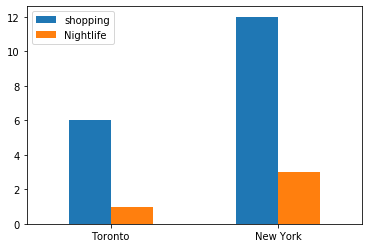

In [628]:
ax = count_data.plot.bar(y=['shopping','Nightlife'],rot=0)